# Introduction 


####This dataset consist listings from popular real estate portals of Madrid and this data name is houses_Madrid.
Madrid is one of the most visited cities in Europe both by tourists and businesspeople, and it’s where many important local and multinational companies.
It has attractive prices and cool type of houses.
This dataset has 21742 rows and 58 columns.
It has columns explain title from listing,neighborhood and city,square meter built,	Square meter useful,Number of rooms,Number of bathrooms,Square meter allotment,Latitude, Longitude (Since portals hide the location mainly NAs),Address,Boolean values,Target Value.
Thorugh houses_Madrid dataset investigation different packages are used (pandas, numpy, matplotlib).
Before the analysis of the dataset we did some operations to clean up the data from unimportant columns, noisy data, and other problems.

In [2]:
# import packages to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





## General Properties : 

In [3]:
# Load csv file named tmdb-movies.csv' into data frame DF
df = pd.read_csv(r"D:\projects\dataset\houses_Madrid.csv")

# dimensions of DF
print("Dimensions of DF: ", df.shape)

# print Information of DF
print("\nInformation about DF: ")
print(df.info())

# First fifth rows of DF
print("\nHead of DF: \n", df.head(3))

Dimensions of DF:  (21742, 58)

Information about DF: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_a

# Data cleaning 

Data cleaning is the process of fixing or removing incorrect, duplicate,noisy, or incomplete data within a dataset. Thorugh data cleaning phase, data wrangling has been conducted for modifying the data into a more usable form.

# Problems With the dataset

1: Remove unused Columns id (there is id column for each house), 'title', 'subtitle'   'is_parking_included_in_price', 'parking_price', 'is_orientation_north','is_orientation_west', 'is_orientation_south', 'is_orientation_east'...etc 
 
2: Remove duplication in the rows (check and process if exist)

3: Remove rows contains noisy data (cheack and process if exist )

4: Check NN values and modify it with a value (zero or mean or median or stay as it is according to the data)


### 1- Remove unused Columns:


Three columns has been deleted from the DF

In [4]:


#removing attributes that wouldnt be neededfor our modeling
df.drop(columns=[ 'Unnamed: 0' , 'title','subtitle','n_floors', 
       'sq_mt_allotment', 'latitude', 'longitude', 'is_exact_address_hidden', 
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parking_price', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east'], inplace=True)





In [5]:
# DF after remove unused columns 
df


,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,raw_address,street_name,rent_price,buy_price,is_new_development,built_year,is_furnished
0,21742,64.0,60.0,2,1.0,"Calle de Godella, 64",Calle de Godella,471,85000,False,1960.0,NaN
1,21741,70.0,NaN,3,1.0,Calle de la del Manojo de Rosas,Calle de la del Manojo de Rosas,666,129900,False,NaN,NaN
2,21740,94.0,54.0,2,2.0,"Calle del Talco, 68",Calle del Talco,722,144247,False,NaN,NaN
3,21739,64.0,NaN,2,1.0,Calle Pedro Jiménez,Calle Pedro Jiménez,583,109900,False,1955.0,NaN
4,21738,108.0,90.0,2,2.0,Carretera de Villaverde a Vallecas,Carretera de Villaverde a Vallecas,1094,260000,False,2003.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21737,5,78.0,NaN,2,2.0,NaN,NaN,1323,350000,False,2020.0,NaN
21738,4,96.0,83.0,2,2.0,Urb. Campo de las Naciones - Corralejos,Urb. Campo de las Naciones - Corralejos,1496,425000,False,2002.0,NaN
21739,3,175.0,NaN,4,2.0,NaN,NaN,2081,680000,False,2002.0,NaN
21740,2,289.0,NaN,4,3.0,"Calle Burriana, 12",Calle Burriana,2115,695000,False,1981.0,NaN


### 2- Remove duplication in the rows (check and process if exist)


In [6]:
# Number of rows 
print(f"Current Number of rows : {df.shape[0]}" )
# check Rows Duplication
duplicated_rows = sum(df.duplicated())
print(f"Number of Duplicated rows : {duplicated_rows}" )
if(duplicated_rows):
    df.drop_duplicates(keep ='first', inplace=True) 
    
print(f"New Number of rows after Removing duplication : {df.shape[0]}")

Current Number of rows : 21742
Number of Duplicated rows : 0
New Number of rows after Removing duplication : 21742


### 3- Remove rows contains noisy data if exist


In [7]:
# Number of Rows before removing rows contains zero value in 'buy_price' and 'rent_price' columns
print("Number of rows before removing noisy data: ", df.shape[0])
# drop rows where value of a 'buy_price' column is zero
df.drop(df.index[df['buy_price'] == 0], inplace = True)

# drop rows where value of a 'rent_price' column is zero
df.drop(df.index[df['rent_price'] == 0], inplace = True)

# Number of Rows after removing rows contains zero value in 'buy_price' and 'rent_price' columns
print("Number of rows after removing noisy data: ", df.shape[0])

Number of rows before removing noisy data:  21742
Number of rows after removing noisy data:  21742


### 4- Check NN values and modify it with a value (zero or mean or median or stay as it is according to the data)

In [8]:
# Display all information about columns on the dataset
df.info()
#sum of nan in each column
df.isna().sum()
#to fill nan value
df.fillna(1,inplace=True)
#after fillna 
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21742 non-null  int64  
 1   sq_mt_built         21616 non-null  float64
 2   sq_mt_useful        8228 non-null   float64
 3   n_rooms             21742 non-null  int64  
 4   n_bathrooms         21726 non-null  float64
 5   raw_address         16277 non-null  object 
 6   street_name         15837 non-null  object 
 7   rent_price          21742 non-null  int64  
 8   buy_price           21742 non-null  int64  
 9   is_new_development  20750 non-null  object 
 10  built_year          10000 non-null  float64
 11  is_furnished        0 non-null      float64
dtypes: float64(5), int64(4), object(3)
memory usage: 2.0+ MB


id                    0
sq_mt_built           0
sq_mt_useful          0
n_rooms               0
n_bathrooms           0
raw_address           0
street_name           0
rent_price            0
buy_price             0
is_new_development    0
built_year            0
is_furnished          0
dtype: int64

## Exploratory Data Analysis :

There is a need for a Unused_space coulumn to be used in EDA phase. (Unused_space = sq_mt_built - sq_mt_useful)

In [9]:
# inser new column named 'Unused_space'
Unused_space = df['sq_mt_built'] - df['sq_mt_useful']
df.insert(4,'Unused_space',Unused_space)

#show data frame after add new column Unused_space
df

,id,sq_mt_built,sq_mt_useful,n_rooms,Unused_space,n_bathrooms,raw_address,street_name,rent_price,buy_price,is_new_development,built_year,is_furnished
0,21742,64.0,60.0,2,4.0,1.0,"Calle de Godella, 64",Calle de Godella,471,85000,False,1960.0,1.0
1,21741,70.0,1.0,3,69.0,1.0,Calle de la del Manojo de Rosas,Calle de la del Manojo de Rosas,666,129900,False,1.0,1.0
2,21740,94.0,54.0,2,40.0,2.0,"Calle del Talco, 68",Calle del Talco,722,144247,False,1.0,1.0
3,21739,64.0,1.0,2,63.0,1.0,Calle Pedro Jiménez,Calle Pedro Jiménez,583,109900,False,1955.0,1.0
4,21738,108.0,90.0,2,18.0,2.0,Carretera de Villaverde a Vallecas,Carretera de Villaverde a Vallecas,1094,260000,False,2003.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,5,78.0,1.0,2,77.0,2.0,1,1,1323,350000,False,2020.0,1.0
21738,4,96.0,83.0,2,13.0,2.0,Urb. Campo de las Naciones - Corralejos,Urb. Campo de las Naciones - Corralejos,1496,425000,False,2002.0,1.0
21739,3,175.0,1.0,4,174.0,2.0,1,1,2081,680000,False,2002.0,1.0
21740,2,289.0,1.0,4,288.0,3.0,"Calle Burriana, 12",Calle Burriana,2115,695000,False,1981.0,1.0


### Descriptive statistics about data :



In [10]:
df.describe()

,id,sq_mt_built,sq_mt_useful,n_rooms,Unused_space,n_bathrooms,rent_price,buy_price,built_year,is_furnished
count,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,2.174200e+04,2.174200e+04,21742.000000,21742.0
mean,10871.500000,146.075246,39.774078,3.005749,106.301168,2.090884,-5.917031e+04,6.537356e+05,906.641799,1.0
std,6276.519112,134.250192,73.600930,1.510497,138.667539,1.406785,9.171162e+05,7.820821e+05,982.508126,0.0
min,1.000000,1.000000,1.000000,0.000000,-997.000000,1.000000,-3.459028e+07,3.600000e+04,1.000000,1.0
25%,5436.250000,70.000000,1.000000,2.000000,17.000000,1.000000,7.250000e+02,1.980000e+05,1.000000,1.0
50%,10871.500000,100.000000,1.000000,3.000000,66.000000,2.000000,1.116000e+03,3.750000e+05,1.000000,1.0
75%,16306.750000,162.000000,65.000000,4.000000,128.000000,2.000000,1.687000e+03,7.636000e+05,1968.000000,1.0
max,21742.000000,999.000000,998.000000,24.000000,998.000000,16.000000,2.517000e+03,8.800000e+06,8170.000000,1.0



### From the above result, we get some important insights:
    

   1- minimum sq_mt_built = 13 , avarage (mean) = 146.9 , maximum = 999 
    

 2 - minumum n_rooms = 0 , avarage (mean) = 3 , maximum = 24 
      

 3 = minimum Unused_space = 1 , avarage(mean) = 18.5 , maximum =485

### Rename some column to give it simple name 

In [11]:
#rename some columns and display it after REname 
df.rename(columns= {'sq_mt_built':'sq_metres', 'n_rooms':'rooms', 'n_bathrooms':'bathrooms', 
                    'rent_price':'rents', 'is_new_development':'newly_developed',
                    'is_furnished':'furnished'}, inplace=True)

df

,id,sq_metres,sq_mt_useful,rooms,Unused_space,bathrooms,raw_address,street_name,rents,buy_price,newly_developed,built_year,furnished
0,21742,64.0,60.0,2,4.0,1.0,"Calle de Godella, 64",Calle de Godella,471,85000,False,1960.0,1.0
1,21741,70.0,1.0,3,69.0,1.0,Calle de la del Manojo de Rosas,Calle de la del Manojo de Rosas,666,129900,False,1.0,1.0
2,21740,94.0,54.0,2,40.0,2.0,"Calle del Talco, 68",Calle del Talco,722,144247,False,1.0,1.0
3,21739,64.0,1.0,2,63.0,1.0,Calle Pedro Jiménez,Calle Pedro Jiménez,583,109900,False,1955.0,1.0
4,21738,108.0,90.0,2,18.0,2.0,Carretera de Villaverde a Vallecas,Carretera de Villaverde a Vallecas,1094,260000,False,2003.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,5,78.0,1.0,2,77.0,2.0,1,1,1323,350000,False,2020.0,1.0
21738,4,96.0,83.0,2,13.0,2.0,Urb. Campo de las Naciones - Corralejos,Urb. Campo de las Naciones - Corralejos,1496,425000,False,2002.0,1.0
21739,3,175.0,1.0,4,174.0,2.0,1,1,2081,680000,False,2002.0,1.0
21740,2,289.0,1.0,4,288.0,3.0,"Calle Burriana, 12",Calle Burriana,2115,695000,False,1981.0,1.0


##   Research Question 1: information about  Top ten streeet in Madrid 

in this code we will know top ten street in madrid which most pepole live there  

In [15]:
x=df['street_name'].value_counts()

Top_ten_Street=x[1:10]

print(Top_ten_Street)



street_name
Paseo de la Castellana               116
Calle de Bravo Murillo                69
Calle del Príncipe de Vergara         60
Calle de Embajadores                  58
Urb. Salamanca Prime                  57
Paseo de las Delicias                 49
Calle de Arturo Soria                 47
Paseo de Santa María de la Cabeza     46
Avenida de la Ciudad de Barcelona     45
Name: count, dtype: int64


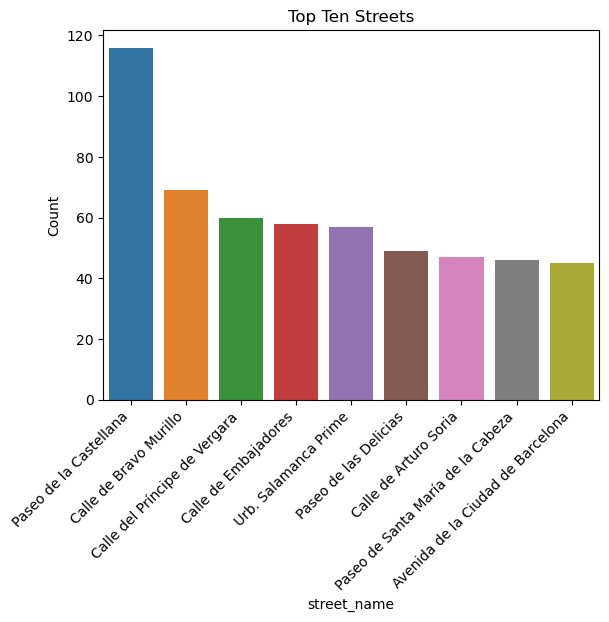

In [16]:
sns.barplot(x=Top_ten_Street.index, y=Top_ten_Street.values)

# Set x-axis label
plt.xlabel('street_name')

# Set y-axis label
plt.ylabel('Count')

# Set plot title
plt.title('Top Ten Streets')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

in the the previous figure show top ten street in madrid and display it in histogram   

In [17]:
df.drop(['street_name', 'raw_address'], axis=1, inplace=True)

## Research Question 2 : ًwhat is  rent price  and buy_price for houses in madrid 

(100.0, 900.0)

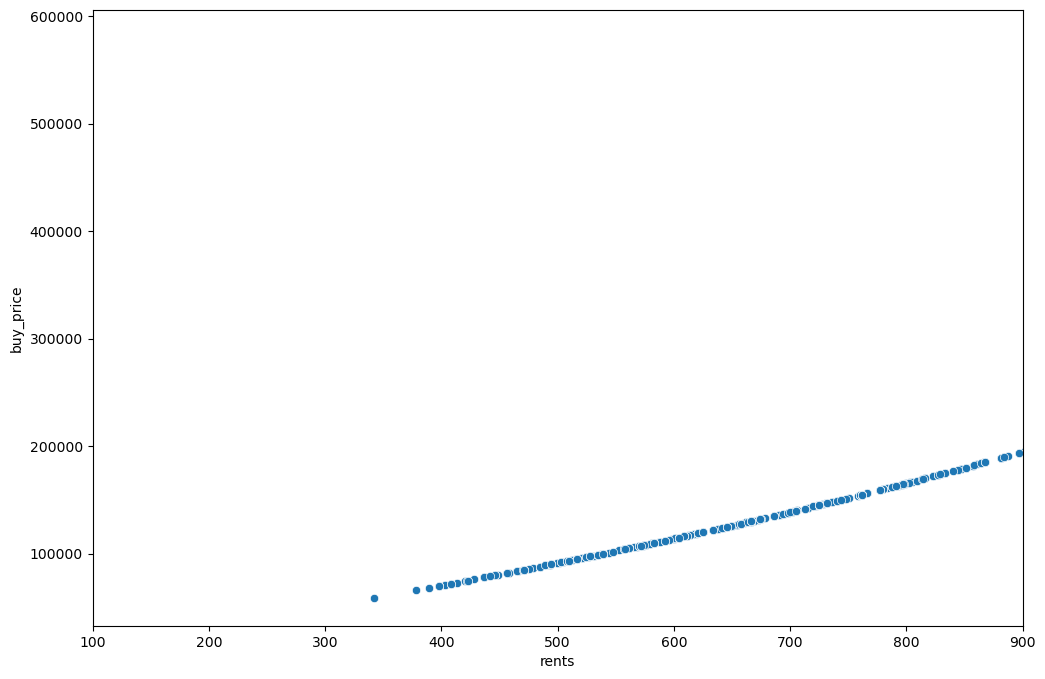

In [20]:
sub_of_data = df.head(1000)
# Buy price versus Rents
plt.figure(figsize=(12,8))
sns.scatterplot(x='rents', y='buy_price', data=sub_of_data )
plt.xlim(100 , 900)


this figure show relation betwen rent price and buy_price
the rent house price and buy_price



## Research Question 3: Correlation between 'sq_metres' , 'rents' , and 'buy_price'

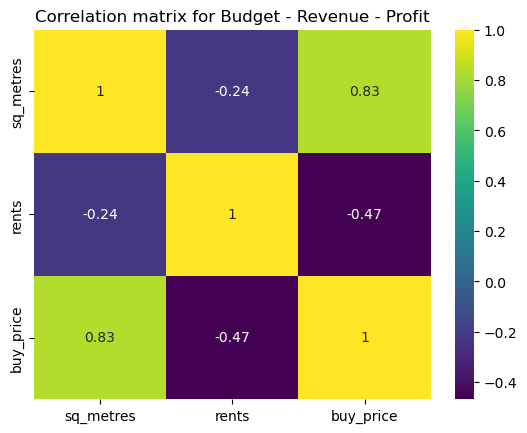

In [18]:
# construct df_ from three columns of the DF (budget, revenue, and profit)
df_ = df[['sq_metres' , 'rents' , 'buy_price']]
# compute correlation using pearson correlation cofficient
corr_mat=df_.corr(method='pearson')
#draw the heatmap
sns.heatmap(corr_mat, cmap='viridis' , annot = True)
#set title
plt.title("Correlation matrix for Budget - Revenue - Profit")
# show plot
plt.show()

From the above Heatmap: There is a positive and nagative correlation between three variables: sq_metres, rents, and buy_price. correlation is computed for each two variable: There is strong positive correlation between sq_metres and buy_price. besides there is a string Nagative correlation between buy_price and rents . in addition there is a Nagative correlation between rents and sq_metres.

## Research Question 4: bur_price per year

In [19]:
df['built_year'].value_counts().sort_index().plot(kind=  'bar' , figsize=(100,100) ,color ='blue')
plt.xlabel('built_year',fontsize=100)
plt.ylabel('buy_price',fontsize=100)




Text(0, 0.5, 'buy_price')

this histogram show realation between bulit_year and Buy_price we can conclude At the beginning of the figure, the older the year, the lower the price In the middle of the figure, we can notice that the price increased by a large percentage in those years At the end of the figure we can see a noticeable change in the price, increasing and decreasing ز


## Research Question 5: which are newly developed vs those which are olden

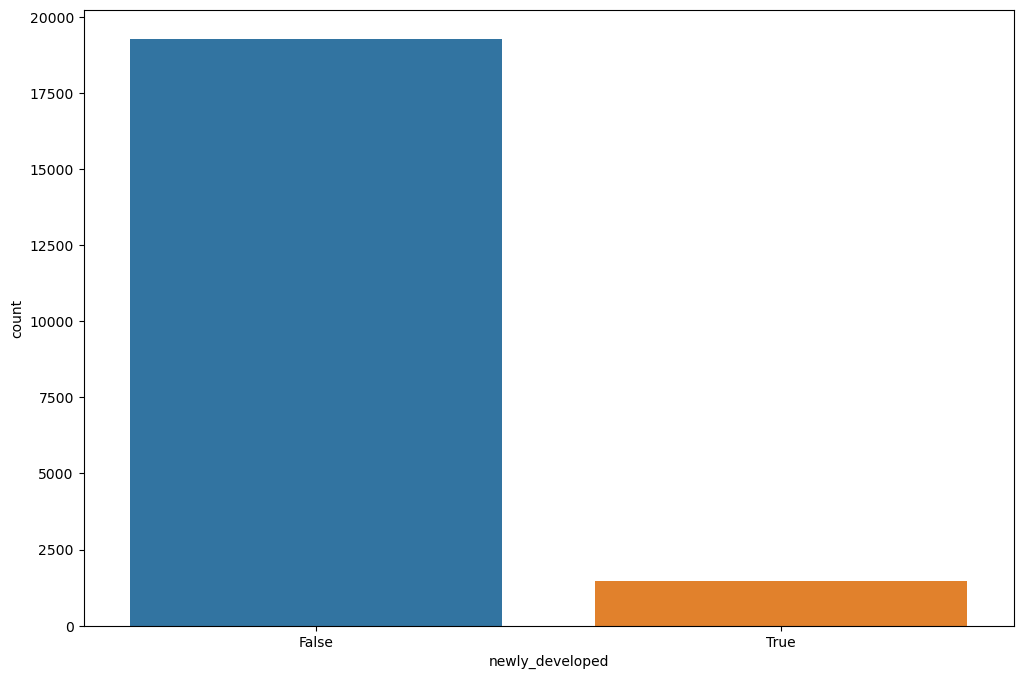

In [20]:
# The quantity of listings which are newly developed vs those which are olden.
plt.figure(figsize=(12,8))
sns.countplot(x='newly_developed' , data=df)

plt.show()

this figure show the number of houses Which are newly_developed in our data frame 

## Research Question 6: Relationship between rooms and bathrooms

C:\Users\magdy mohamed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


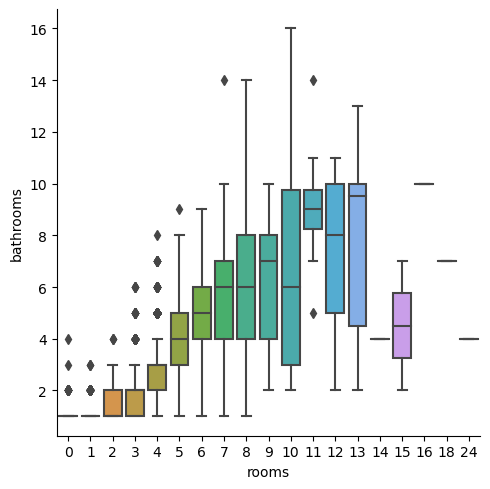

In [26]:
sns.catplot(x='rooms', y='bathrooms' ,data=df , kind='box')
plt.show()

this box Plot show the realatonship between Number of rooms and numer of bathrooms in madrid houses minumem , maximum and meadine

## Research Question 7 :  correlations between the variables

In [22]:
df.drop([ 'id','Unused_space' , 'newly_developed' ,'sq_mt_useful' ,'furnished'  ], axis=1, inplace=True)
#correlation of the variables present in this analysis
new_data_frame = df.corr()
new_data_frame


,sq_metres,rooms,bathrooms,rents,buy_price,built_year
sq_metres,1.000000,0.715981,0.852856,-0.235463,0.832039,0.056167
rooms,0.715981,1.000000,0.729152,-0.158425,0.608893,0.019483
bathrooms,0.852856,0.729152,1.000000,-0.196753,0.772218,0.066458
rents,-0.235463,-0.158425,-0.196753,1.000000,-0.468449,0.002387
buy_price,0.832039,0.608893,0.772218,-0.468449,1.000000,0.008514
built_year,0.056167,0.019483,0.066458,0.002387,0.008514,1.000000


<Axes: >

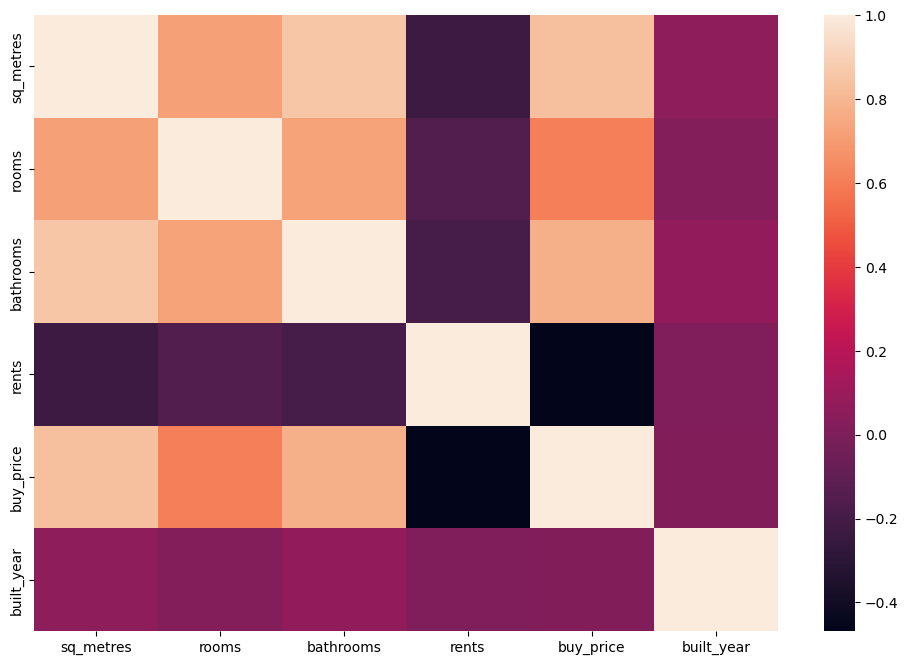

In [23]:

# Visualization of the correlations between the variables
plt.figure(figsize=(12,8))
sns.heatmap(new_data_frame)

this heat map show ralation between all variabe in df 

## Research Question 8 : correlations between price and squere meters 

In [30]:
sub_of_data2=df.head(100)

<Axes: xlabel='sq_metres', ylabel='buy_price'>

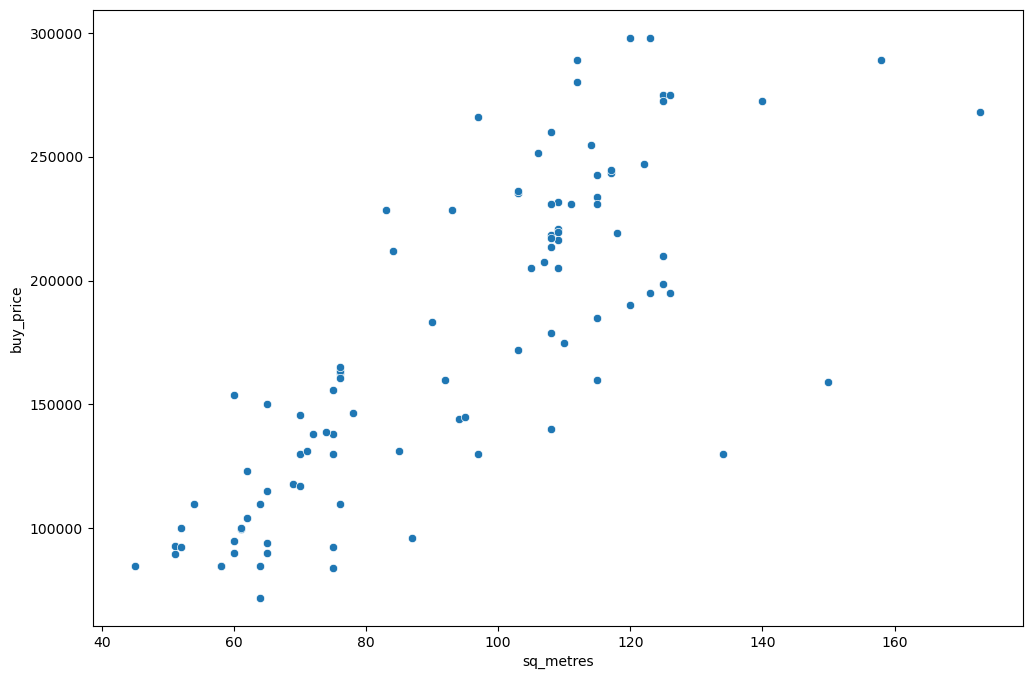

In [31]:
# VISUALIZATION SHOWING BUY PRICE AND SQUARE METRES
plt.figure(figsize=(12,8))
sns.scatterplot(x='sq_metres', y='buy_price', data=sub_of_data2)


<Axes: xlabel='sq_metres'>

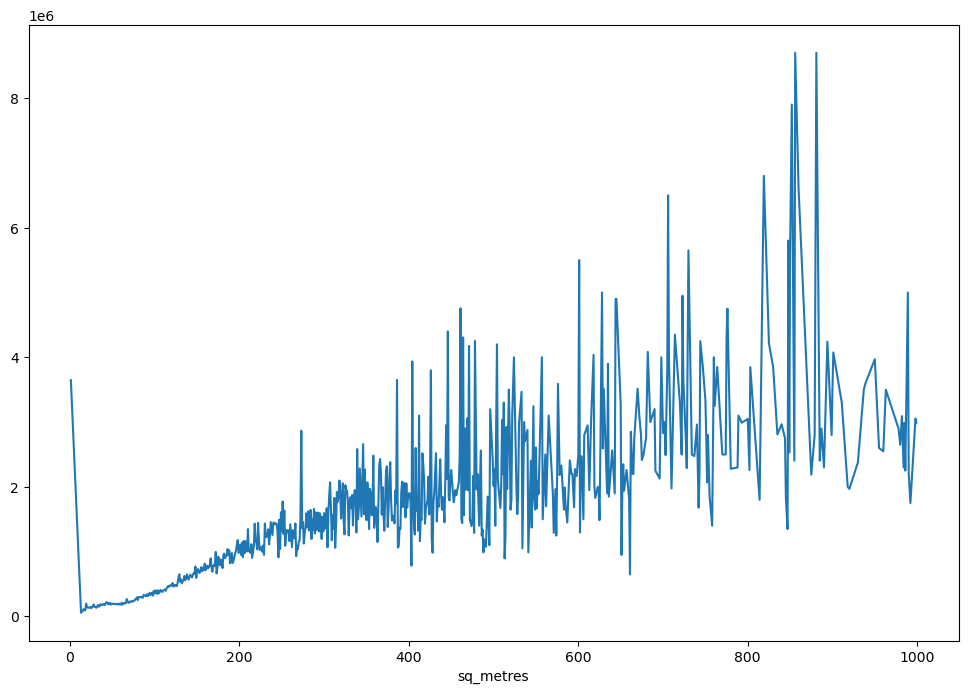

In [38]:
# Visualization of the trend between buy-prices and square metres

plt.figure(figsize=(12,8))
df.groupby('sq_metres').mean()['buy_price'].plot()


This figure show The larger the area, the higher the price and it not a rull in the figure we can oserve deffrant between price  

## Research Question 9 : correlations between buy_price and built_price 

C:\Users\magdy mohamed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


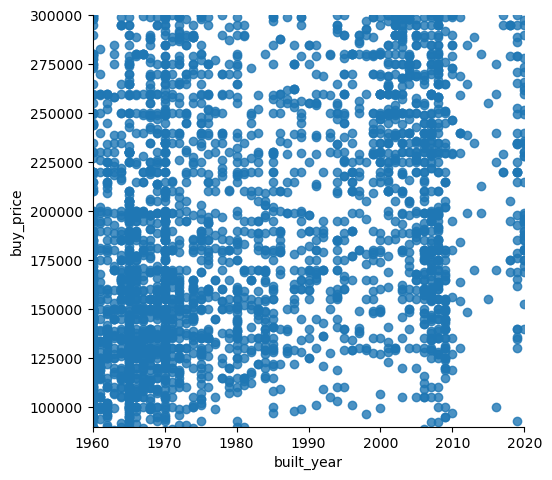

In [47]:

sns.lmplot(   x='built_year' ,y='buy_price' ,data=df)

plt.xlim(1970,2020)
plt.ylim(90000,300000)
# Show the plot
plt.show()

this plot show the linear realation ship between buy_price and bulit_year and show buy_price change per years 

## Research Question 10 : correlations between rooms and sq_mt_useful

C:\Users\magdy mohamed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


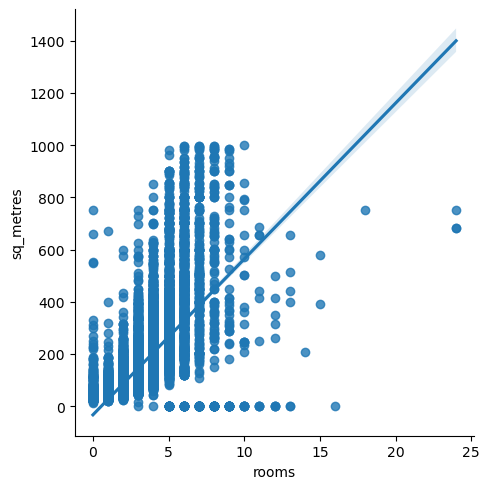

In [33]:
#relation between number of rooms and sq_mt_useful


#df.plot(x='rooms',y='sq_metres',  kind='scatter',color='black')

sns.lmplot(  x='rooms' ,y= 'sq_metres' ,data=df)



# Show the plot
plt.show()

this scatter plot show relation between number of rooms and sq_mt_useful

The more rooms, the more space


## Research Question 11 : What is the most size house in Madrir .

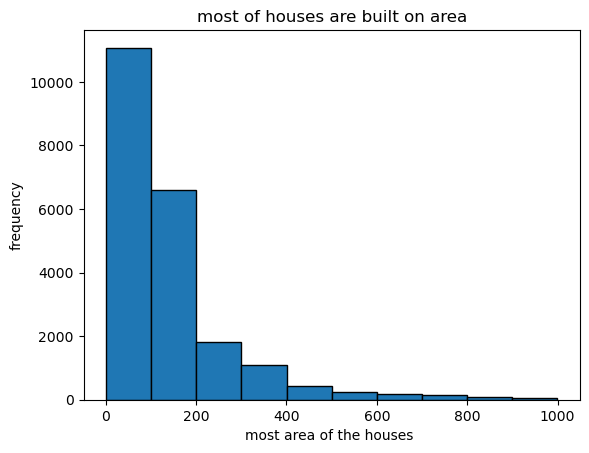

In [36]:
plt.hist(df.sq_metres,edgecolor='black')
plt.xlabel('most area of the houses ')
plt.ylabel("frequency")
plt.title("most of houses are built on area")
plt.show()

# Conclusions


This dataset is very rich in information. Some limitations the dataset contains are null and zero values in some features. These zero and null values hinders the analysis and have to be removed the rows that correspond to these zero and null values. Fore example null values is an obstacle which stopped me when I was analyzing the top casted actors. Furthermore zero values creates false results during the correlation plots and computing the pearson correlation. Hence data cleaning is a necessary part before moving on to the dataset's investigation.
our data science project on Madrid houses has provided valuable insights into the factors influencing house prices and trends in the local real estate market. Through comprehensive data collection, exploratory data analysis (EDA), and machine learning modeling, we have gained a deeper understanding of the dynamics that shape the housing landscape in Madrid.we did an explaination as we can to make this dataset easy for understood.

1-insight of buy_price:max=(8.8000+e),min=(3.60000+e),average=(6.537356)

2-insight if n_bathrooms:max=(16.0000),min=(1.000000),average=(2.091687)

3-insigth of sq_mt_useful:max=(998.00),min=(1.0000),average=(103.458192)

4-paseo_de_lacastellana and calledo_de_bravo_murlino are most street people are live in there

5-there is negative relation between built_year and buy_price


6-there is positive corrleation between square_meters and buy_price
    

7-the number of olden house are more than the housesthat are newly devolped 
 

8-there is positive corrleation etween 'sq_meters','rents','buy_pricec'


9-all housein madrid are not equal in n_rooms and n_bathrooms


10-the avenida_de_la_ciuded_de_barcelona and calle_de_al_cala are lowest two street people are live there